# Import the necessary libraries

In [5]:
import pandas as pd
import ta
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from IPython.display import display, Markdown


# Apply Analysis Indicators with TA-Lib

## Technical Analysis for AAPL_historical_data.csv

Data loaded successfully from ../data/yfinance_data/AAPL_historical_data.csv
Indicators applied successfully for ../data/yfinance_data/AAPL_historical_data.csv
Data with indicators saved to ../data/yfinance_data/AAPL_with_indicators.csv


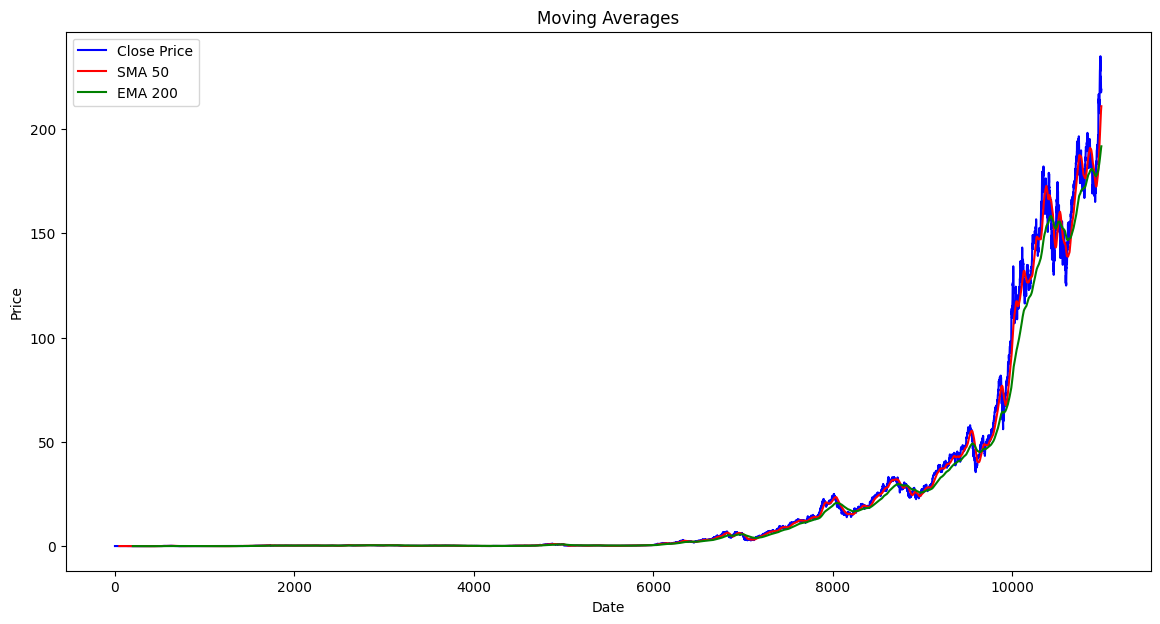

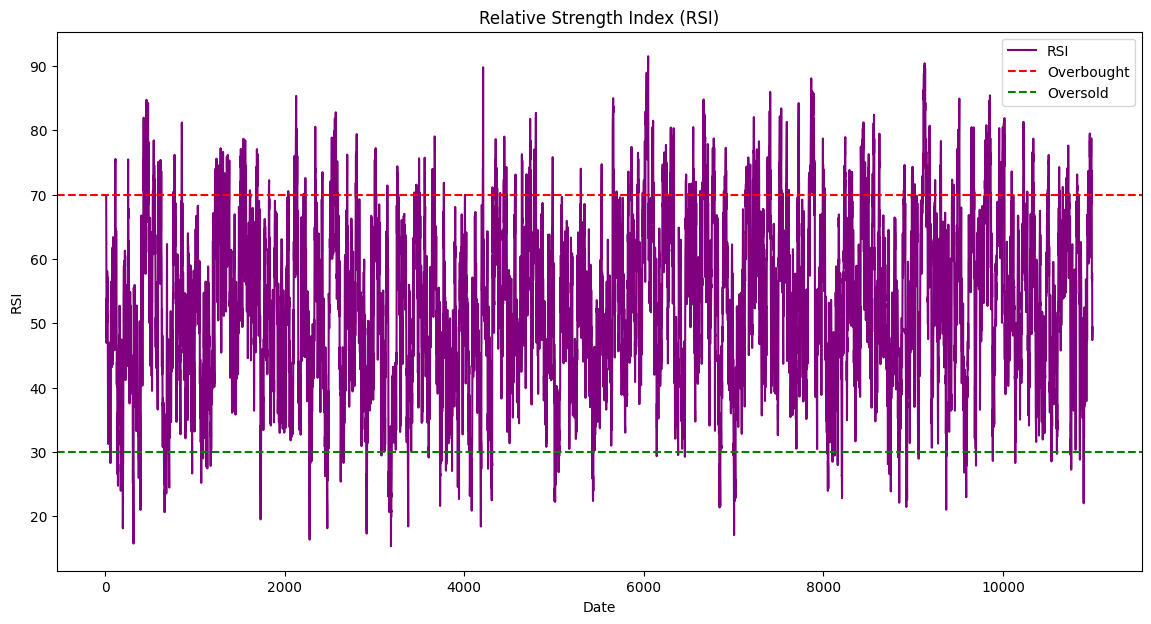

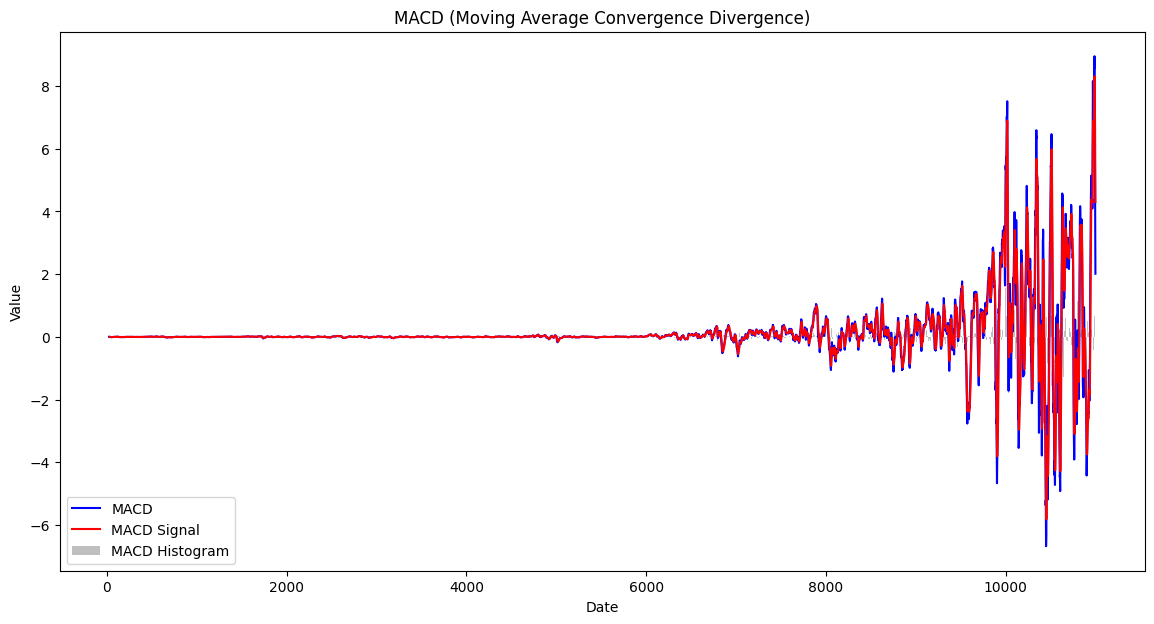

### Output saved to AAPL_with_indicators.csv

## Technical Analysis for GOOG_historical_data.csv

Data loaded successfully from ../data/yfinance_data/GOOG_historical_data.csv
Indicators applied successfully for ../data/yfinance_data/GOOG_historical_data.csv
Data with indicators saved to ../data/yfinance_data/GOOG_with_indicators.csv


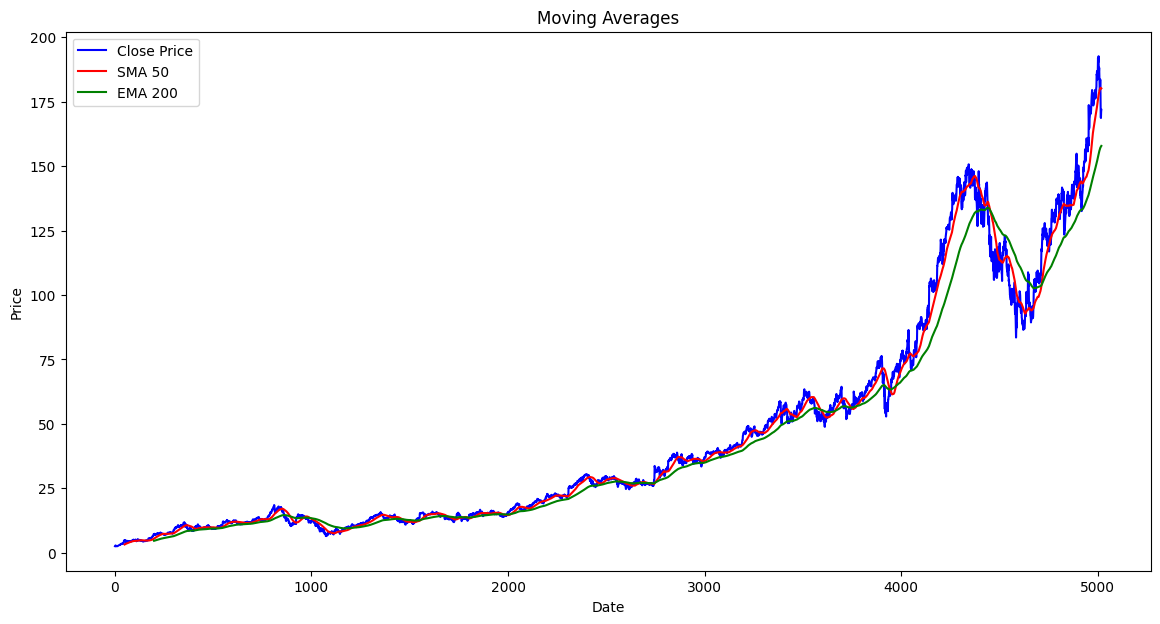

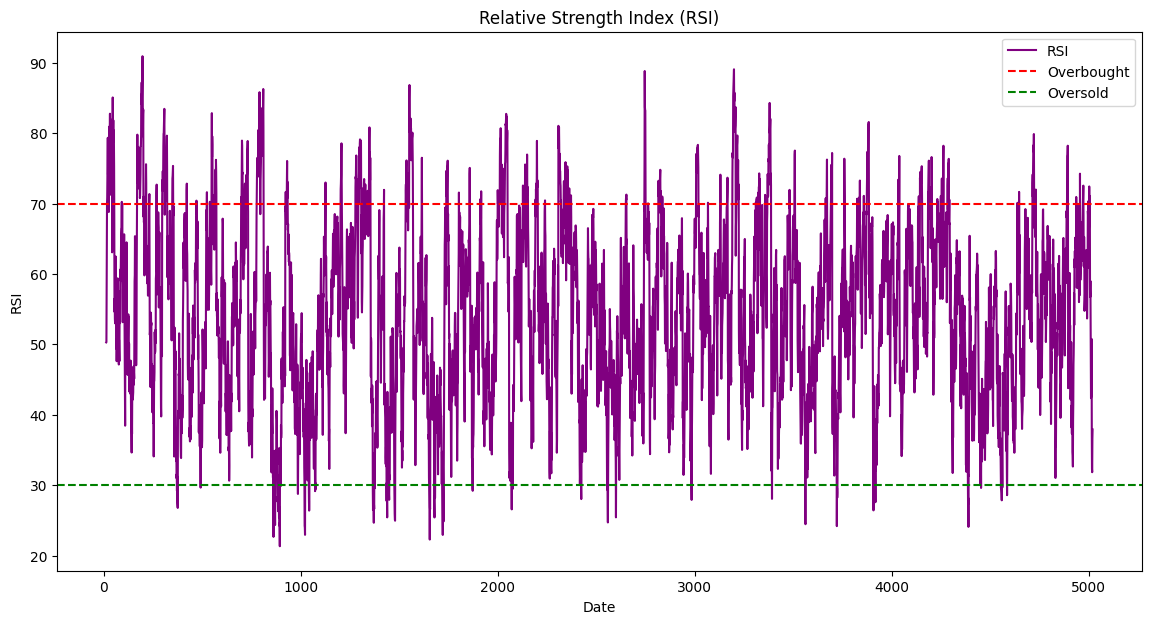

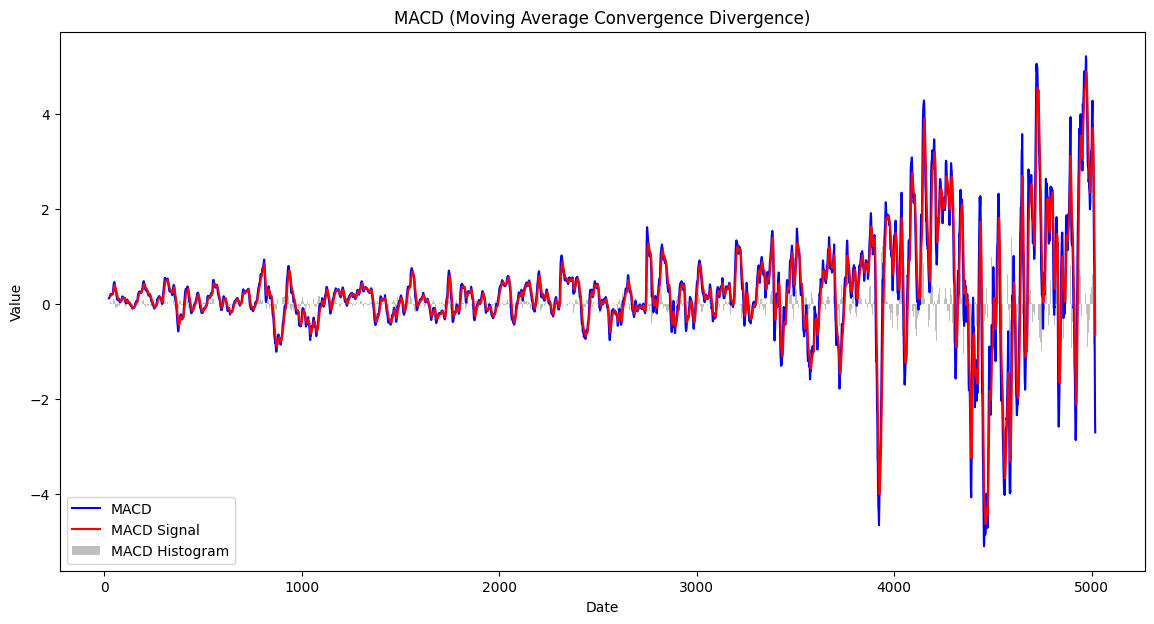

### Output saved to GOOG_with_indicators.csv

## Technical Analysis for MSFT_historical_data.csv

Data loaded successfully from ../data/yfinance_data/MSFT_historical_data.csv
Indicators applied successfully for ../data/yfinance_data/MSFT_historical_data.csv
Data with indicators saved to ../data/yfinance_data/MSFT_with_indicators.csv


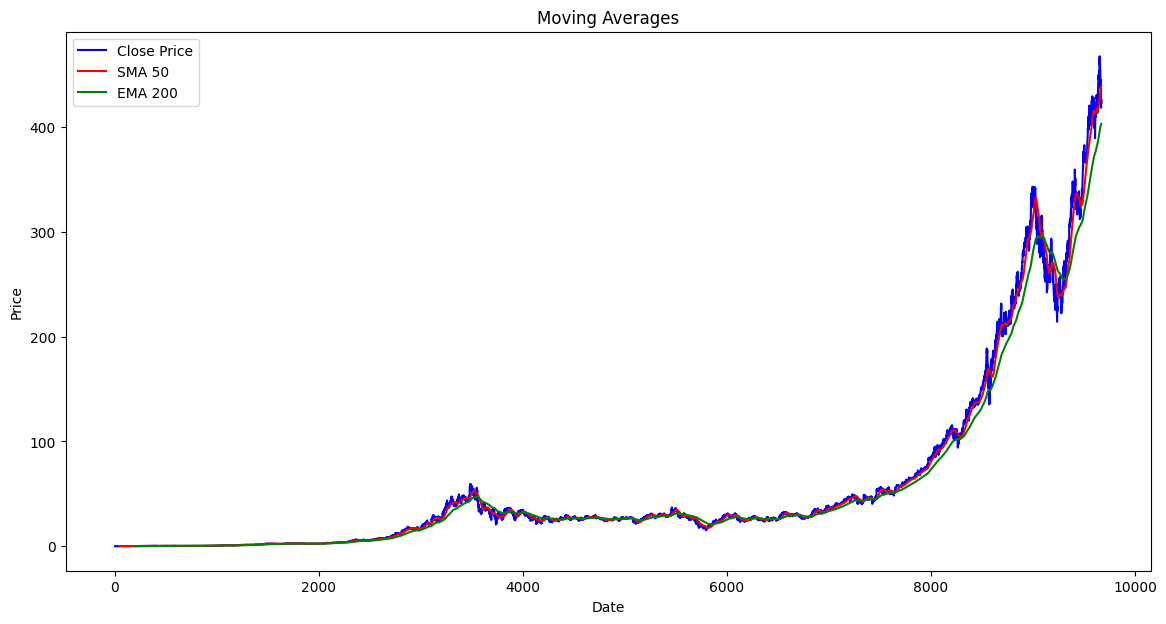

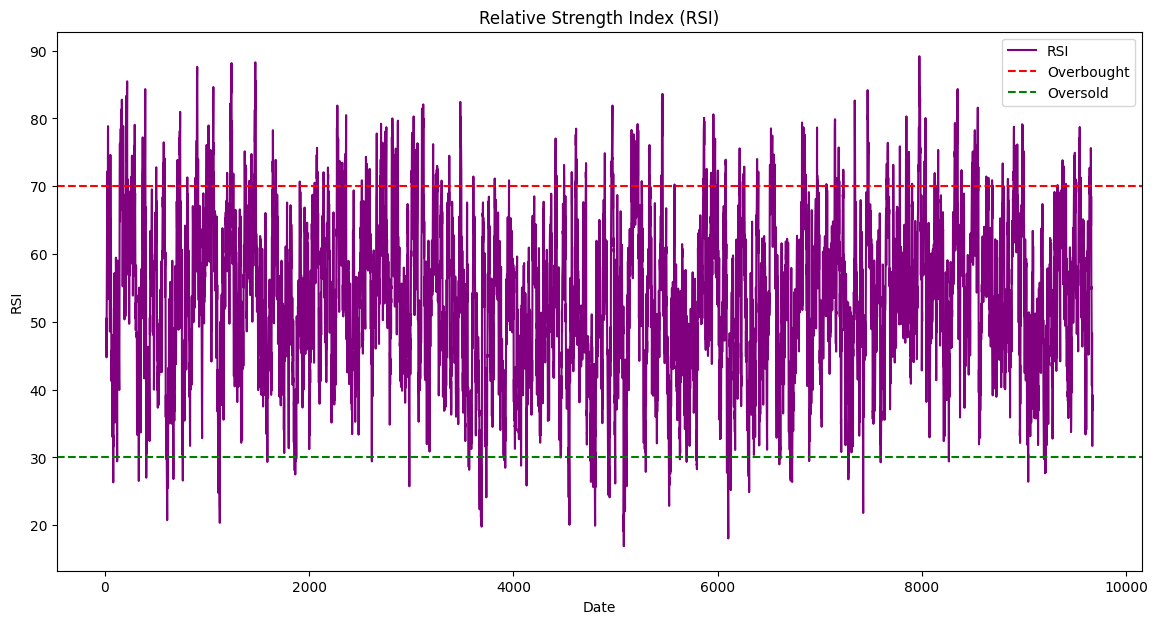

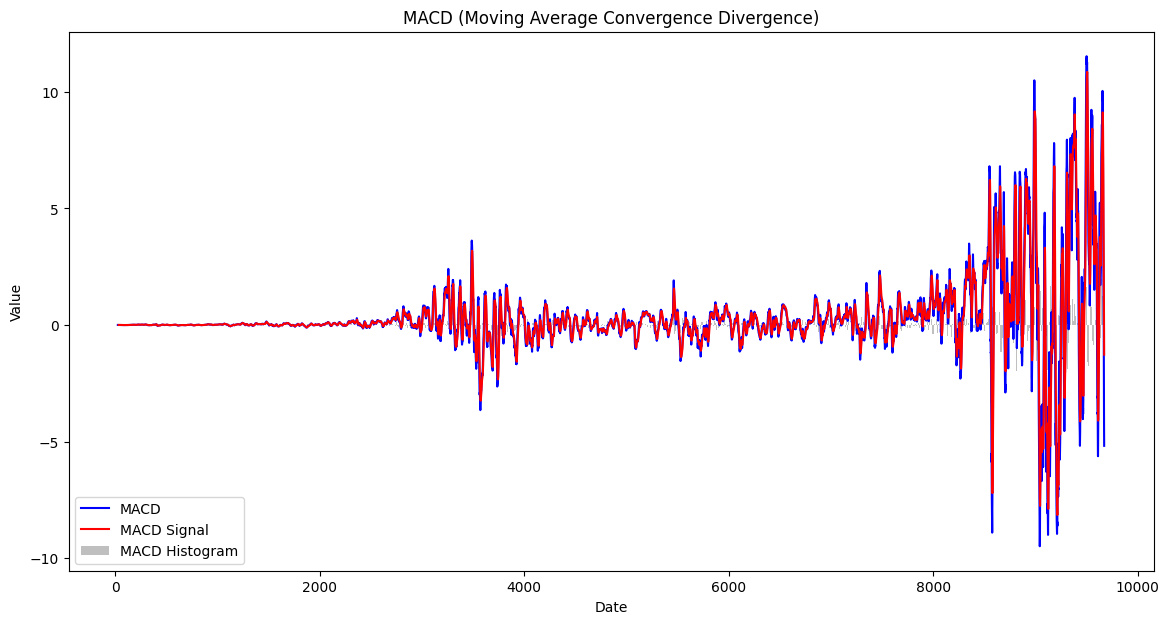

### Output saved to MSFT_with_indicators.csv

## Technical Analysis for TSLA_historical_data.csv

Data loaded successfully from ../data/yfinance_data/TSLA_historical_data.csv
Indicators applied successfully for ../data/yfinance_data/TSLA_historical_data.csv
Data with indicators saved to ../data/yfinance_data/TSLA_with_indicators.csv


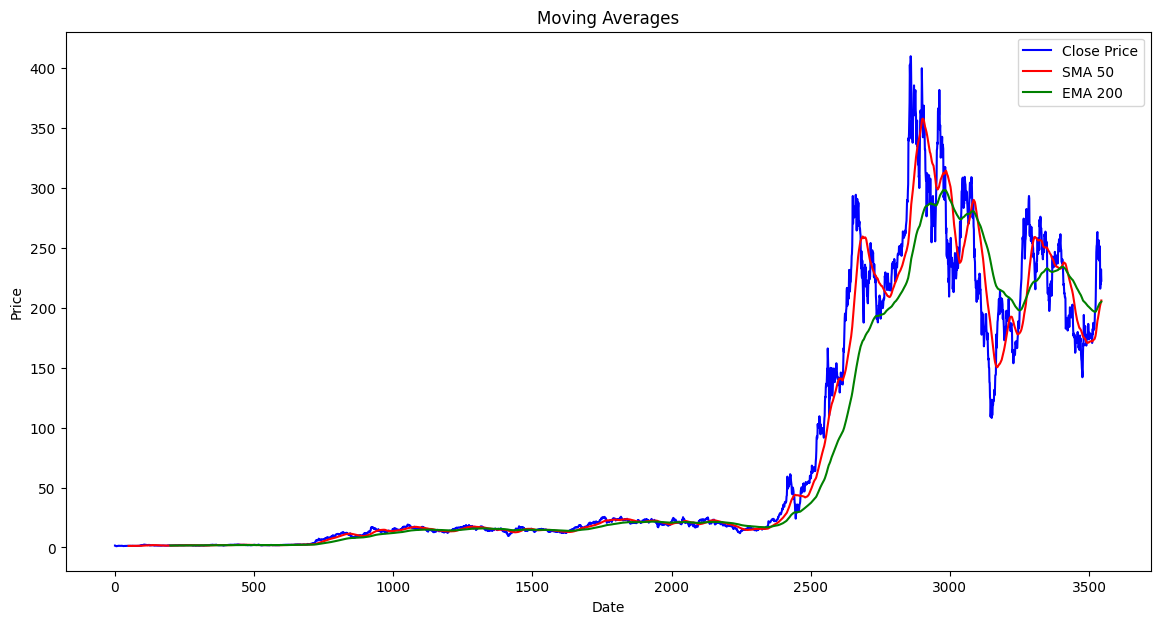

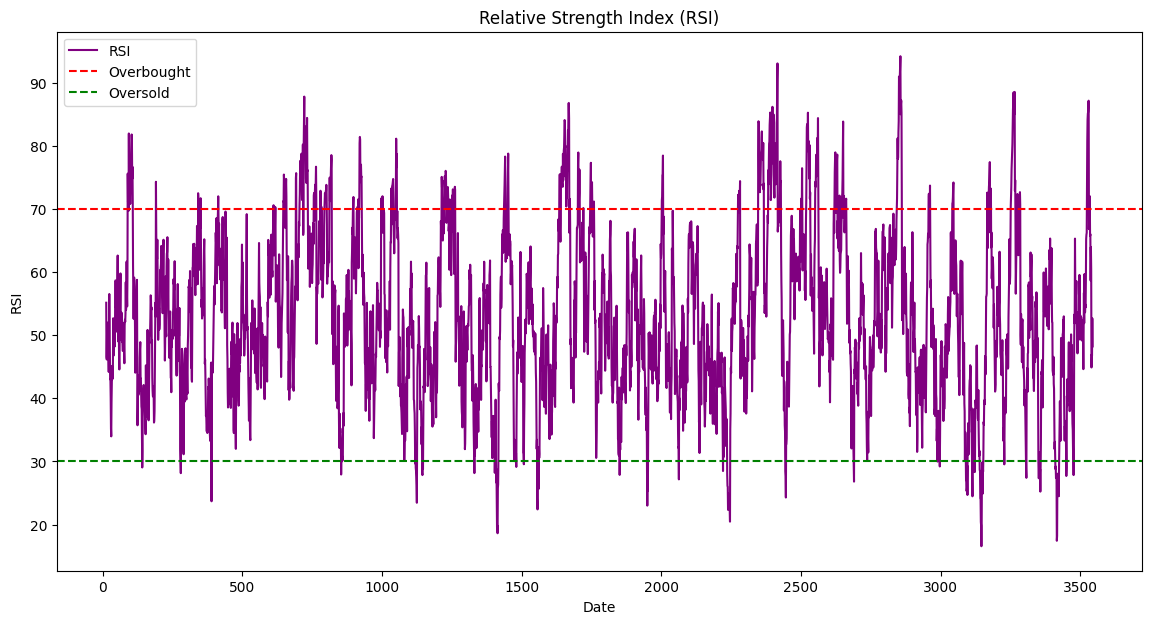

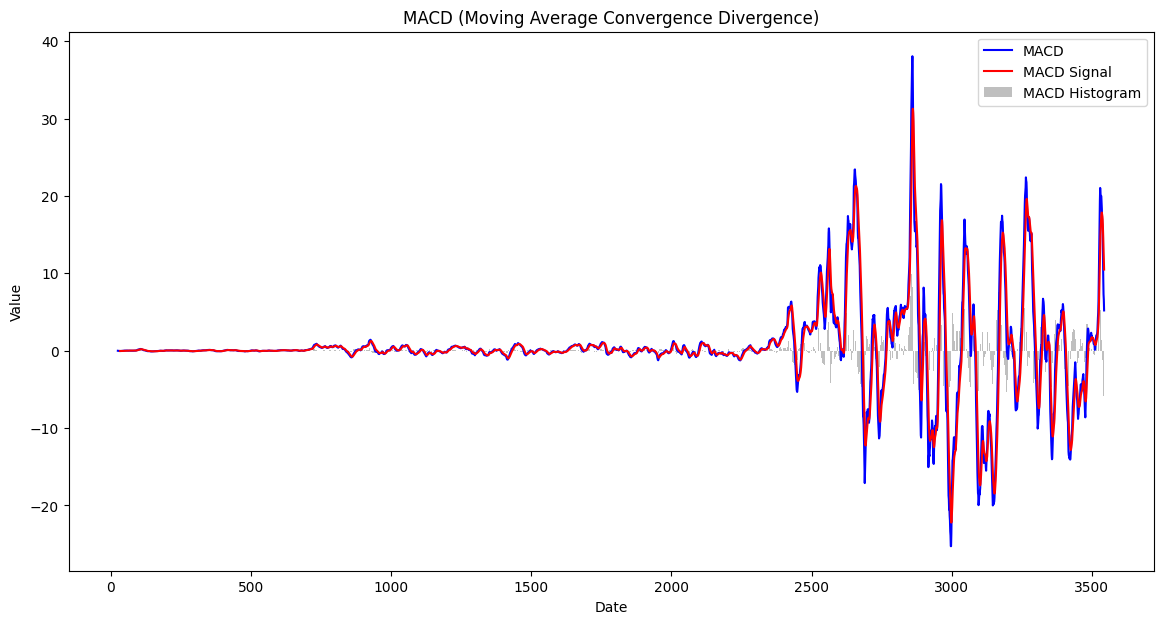

### Output saved to TSLA_with_indicators.csv

## Technical Analysis for AMZN_historical_data.csv

Data loaded successfully from ../data/yfinance_data/AMZN_historical_data.csv
Indicators applied successfully for ../data/yfinance_data/AMZN_historical_data.csv
Data with indicators saved to ../data/yfinance_data/AMZN_with_indicators.csv


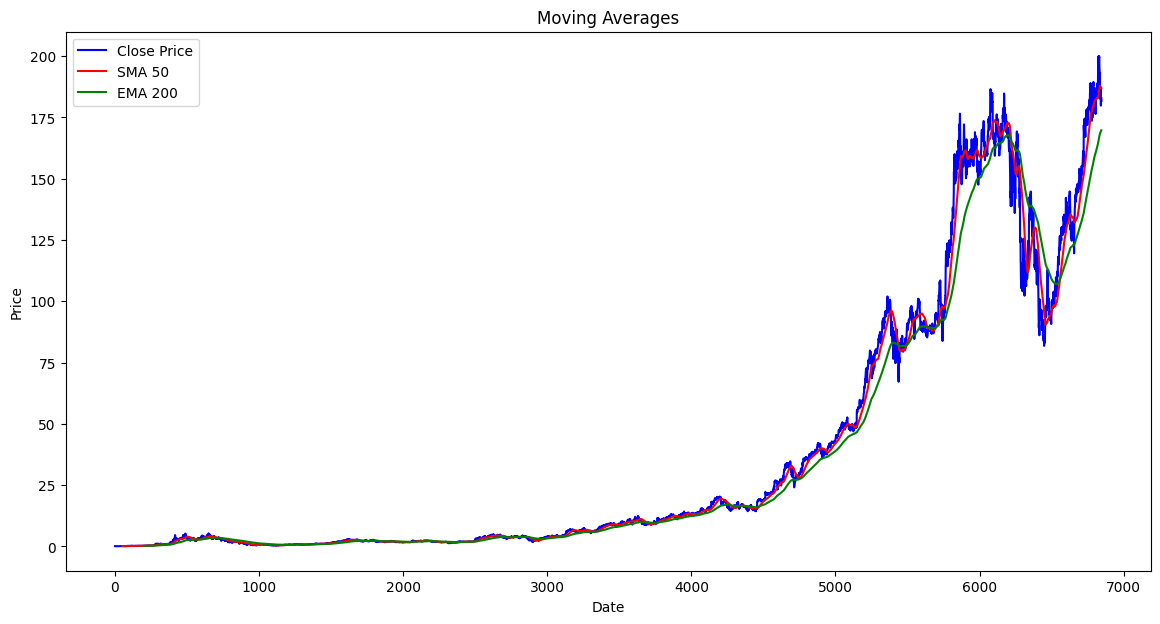

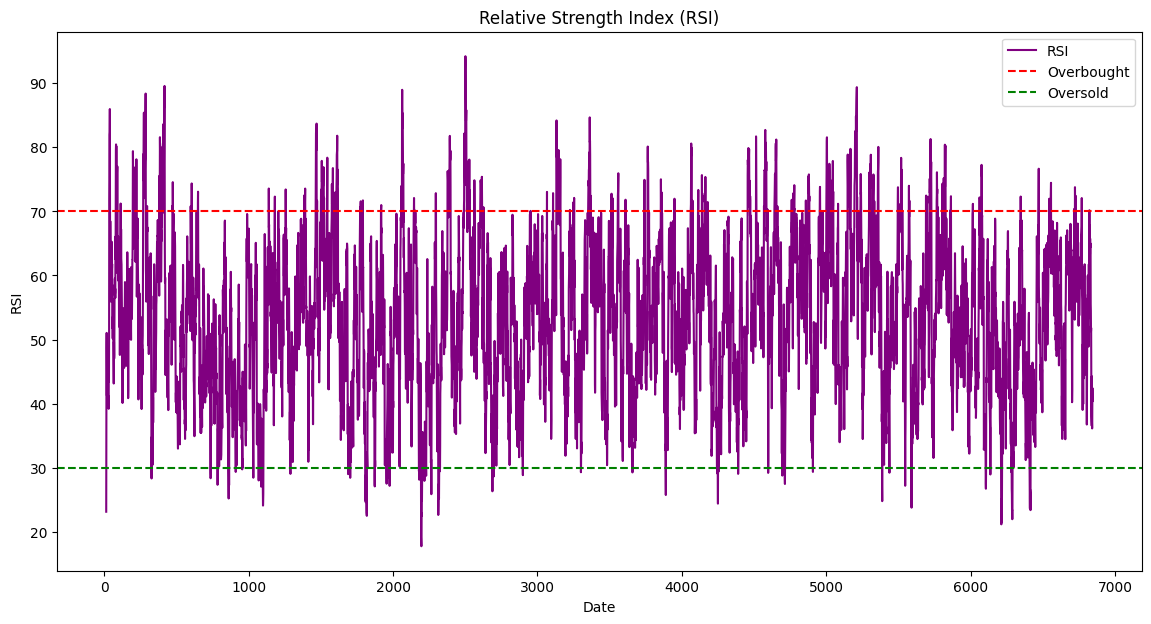

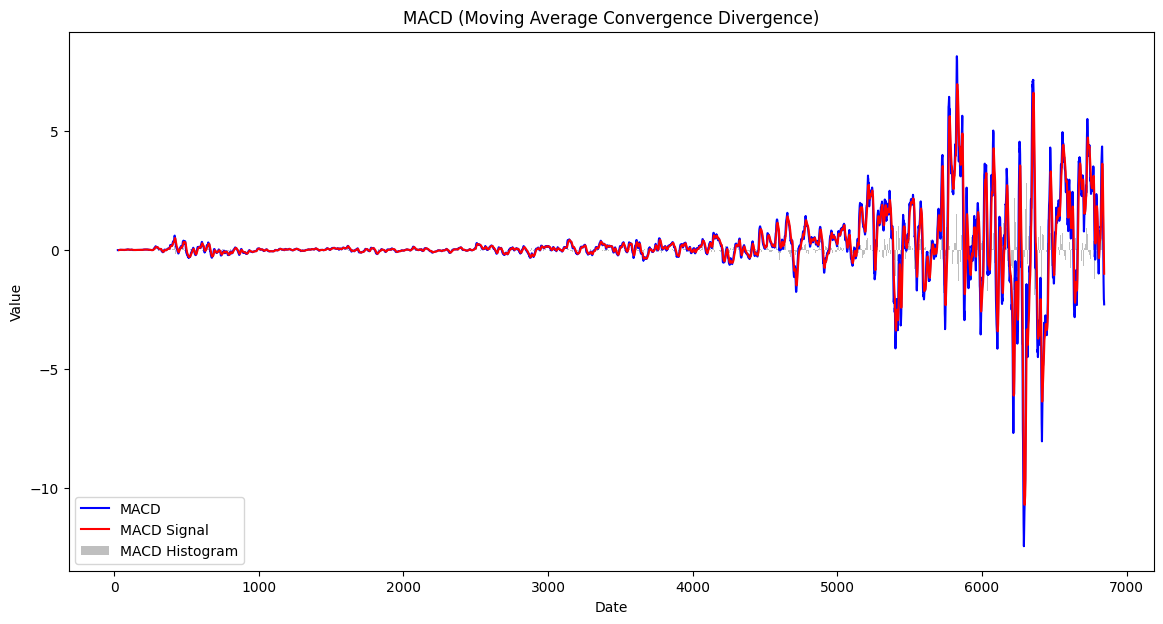

### Output saved to AMZN_with_indicators.csv

## Technical Analysis for META_historical_data.csv

Data loaded successfully from ../data/yfinance_data/META_historical_data.csv
Indicators applied successfully for ../data/yfinance_data/META_historical_data.csv
Data with indicators saved to ../data/yfinance_data/META_with_indicators.csv


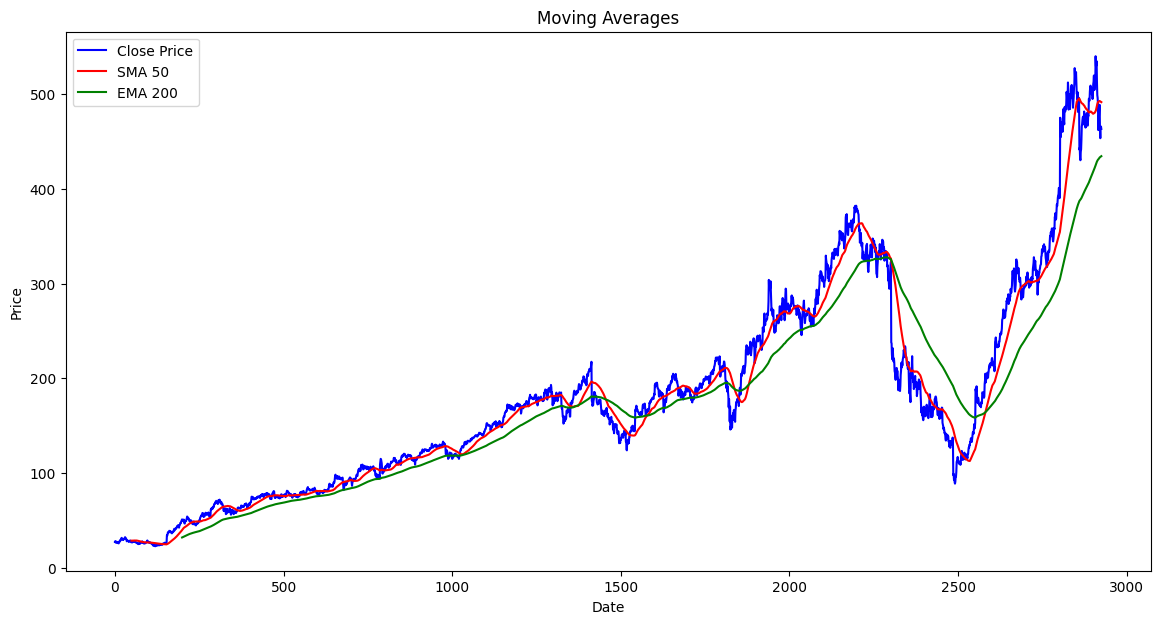

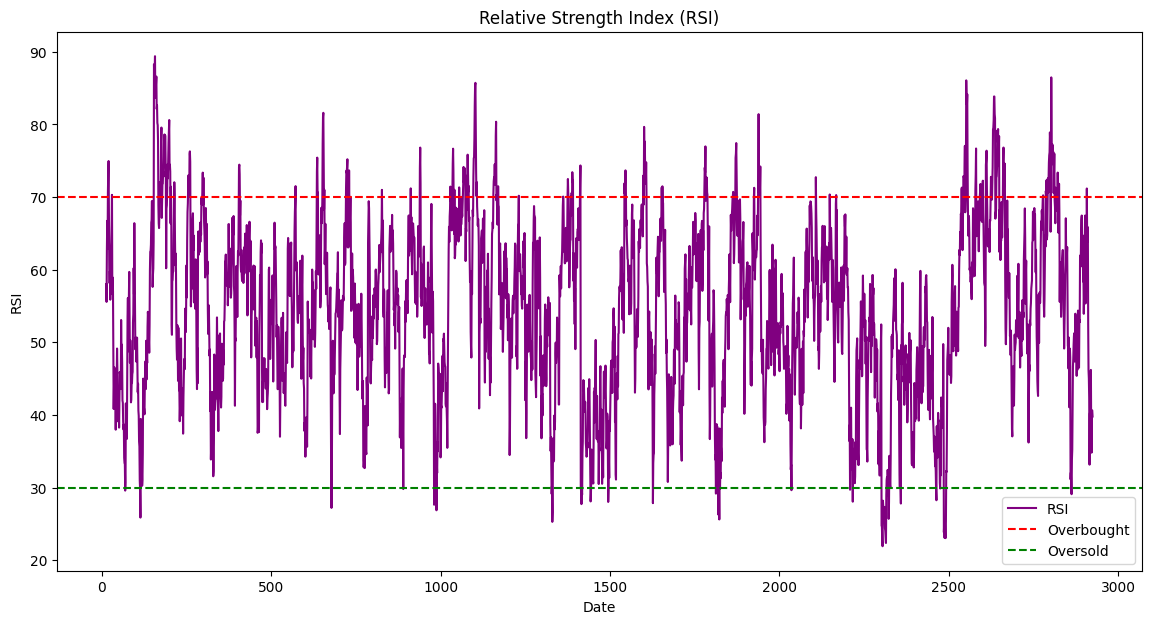

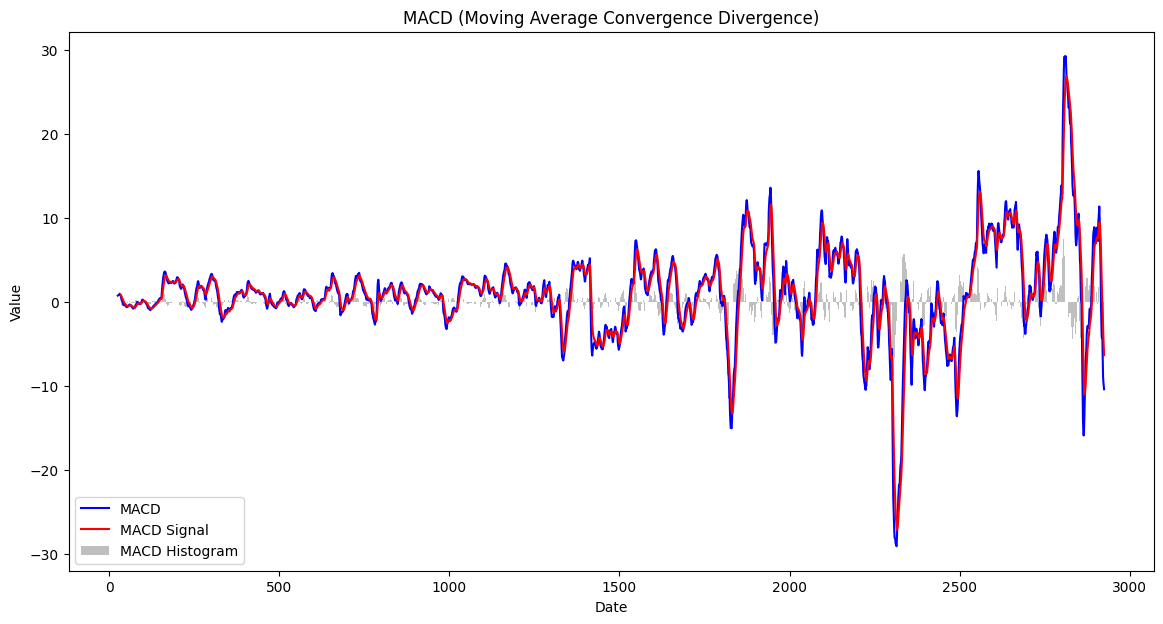

### Output saved to META_with_indicators.csv

## Technical Analysis for NVDA_historical_data.csv

Data loaded successfully from ../data/yfinance_data/NVDA_historical_data.csv
Indicators applied successfully for ../data/yfinance_data/NVDA_historical_data.csv
Data with indicators saved to ../data/yfinance_data/NVDA_with_indicators.csv


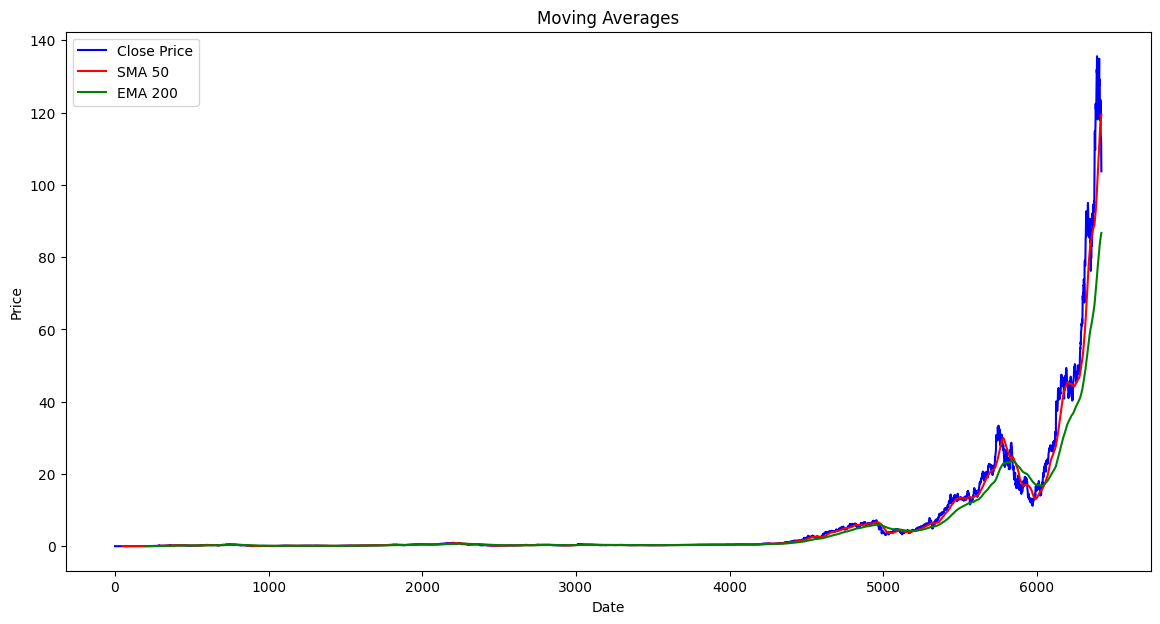

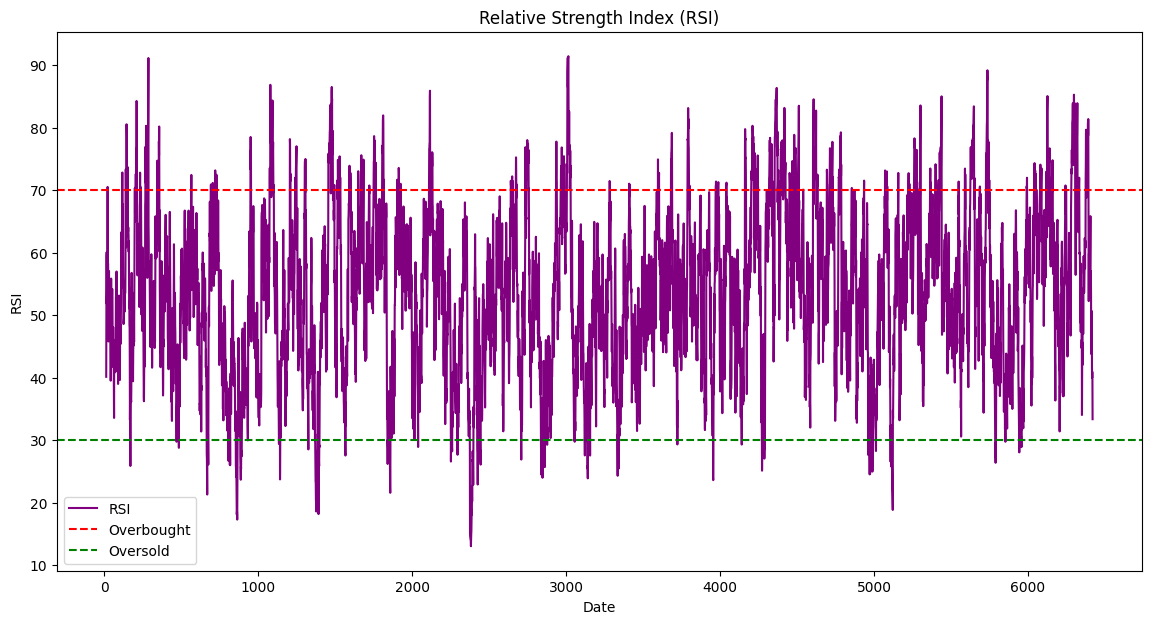

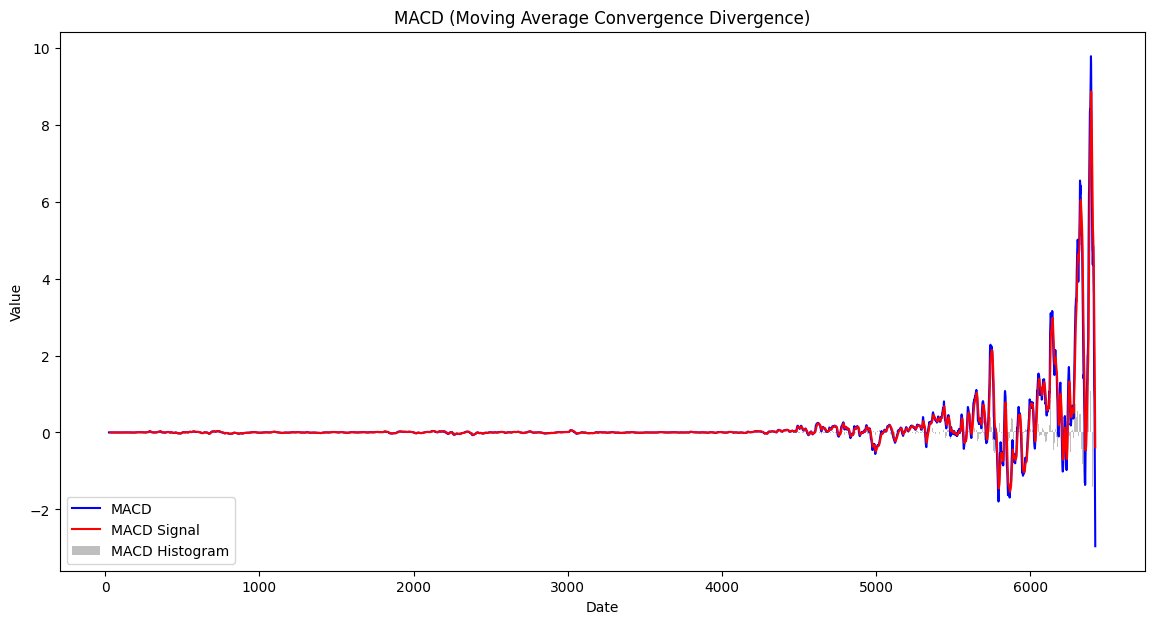

### Output saved to NVDA_with_indicators.csv

In [6]:




# Defining the TechnicalAnalysis class
class TechnicalAnalysis:
    def __init__(self, file_path):
        """Initialize the TechnicalAnalysis object with the file path."""
        self.file_path = file_path
        self.data = None
    
    def load_data(self):
        """Load CSV data into a DataFrame."""
        self.data = pd.read_csv(self.file_path)
        print(f"Data loaded successfully from {self.file_path}")
    
    def apply_indicators(self):
        """Apply TA indicators and add them as new columns."""
        if self.data is None:
            raise ValueError("Data not loaded. Please load the data first.")
        
        # Ensure columns exist
        required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
        for col in required_columns:
            if col not in self.data.columns:
                raise ValueError(f"Missing required column: {col}")

        # Moving Averages
        self.data['SMA_50'] = ta.trend.SMAIndicator(self.data['Close'], window=50).sma_indicator()
        self.data['EMA_200'] = ta.trend.EMAIndicator(self.data['Close'], window=200).ema_indicator()
        
        # Relative Strength Index (RSI)
        self.data['RSI'] = ta.momentum.RSIIndicator(self.data['Close'], window=14).rsi()
        
        # Moving Average Convergence Divergence (MACD)
        macd = ta.trend.MACD(self.data['Close'])
        self.data['MACD'] = macd.macd()
        self.data['MACD_signal'] = macd.macd_signal()
        self.data['MACD_hist'] = macd.macd_diff()
        
        print(f"Indicators applied successfully for {self.file_path}")

    def plot_moving_averages(self):
        """Plot Moving Averages along with the closing price."""
        if self.data is None:
            raise ValueError("Data not loaded. Please load the data first.")
        
        plt.figure(figsize=(14, 7))
        plt.plot(self.data['Close'], label='Close Price', color='blue')
        plt.plot(self.data['SMA_50'], label='SMA 50', color='red')
        plt.plot(self.data['EMA_200'], label='EMA 200', color='green')
        plt.title('Moving Averages')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def plot_rsi(self):
        """Plot RSI indicator."""
        if self.data is None:
            raise ValueError("Data not loaded. Please load the data first.")
        
        plt.figure(figsize=(14, 7))
        plt.plot(self.data['RSI'], label='RSI', color='purple')
        plt.axhline(y=70, color='red', linestyle='--', label='Overbought')
        plt.axhline(y=30, color='green', linestyle='--', label='Oversold')
        plt.title('Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.show()

    def plot_macd(self):
        """Plot MACD and its Signal Line."""
        if self.data is None:
            raise ValueError("Data not loaded. Please load the data first.")
        
        plt.figure(figsize=(14, 7))
        plt.plot(self.data['MACD'], label='MACD', color='blue')
        plt.plot(self.data['MACD_signal'], label='MACD Signal', color='red')
        plt.bar(self.data.index, self.data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.5)
        plt.title('MACD (Moving Average Convergence Divergence)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

    def save_data(self, output_path):
        """Save the updated DataFrame with indicators to a new CSV file."""
        if self.data is None:
            raise ValueError("Data not loaded. Please load the data first.")
        
        self.data.to_csv(output_path, index=False)
        print(f"Data with indicators saved to {output_path}")

    def perform_analysis(self, output_path):
        """Run the full analysis process."""
        self.load_data()
        # display(HTML(f"<h1>This section provides summary statistics such as mean, standard deviation, min, and max for the dataset.</h1>"))
        self.apply_indicators()
        # display(HTML(f"<h1>This section provides summary statistics such as mean, standard deviation, min, and max for the dataset.</h1>"))
        self.save_data(output_path)
        # display(HTML(f"<h1>This section provides summary statistics such as mean, standard deviation, min, and max for the dataset.</h1>"))
        self.plot_moving_averages()
        # display(HTML(f"<h1>This section provides summary statistics such as mean, standard deviation, min, and max for the dataset.</h1>"))
        self.plot_rsi()
        # display(HTML(f"<h1>This section provides summary statistics such as mean, standard deviation, min, and max for the dataset.</h1>"))
        self.plot_macd()

# List of file paths and output paths
csv_files = [
    '../data/yfinance_data/AAPL_historical_data.csv',
    '../data/yfinance_data/GOOG_historical_data.csv',
    '../data/yfinance_data/MSFT_historical_data.csv',
    '../data/yfinance_data/TSLA_historical_data.csv',
    '../data/yfinance_data/AMZN_historical_data.csv',
    '../data/yfinance_data/META_historical_data.csv',
    '../data/yfinance_data/NVDA_historical_data.csv',
]

# Output paths for processed files
output_files = [
    '../data/yfinance_data/AAPL_with_indicators.csv',
    '../data/yfinance_data/GOOG_with_indicators.csv',
    '../data/yfinance_data/MSFT_with_indicators.csv',
    '../data/yfinance_data/TSLA_with_indicators.csv',
    '../data/yfinance_data/AMZN_with_indicators.csv',
    '../data/yfinance_data/META_with_indicators.csv',
    '../data/yfinance_data/NVDA_with_indicators.csv',
]

# Performing Technical Analysis for all files in a loop
for input_file, output_file in zip(csv_files, output_files):
    # Extracting the file name to use in the title
    input_file_name = input_file.split('/')[-1]
    output_file_name = output_file.split('/')[-1]
    
    # Displaying a Markdown title for each Technical Analysis section
    display(Markdown(f"## Technical Analysis for {input_file_name}"))
    
    # Performing Technical Analysis and saving the results
    analysis = TechnicalAnalysis(input_file)
    analysis.perform_analysis(output_file)
    
    # Displaying a Markdown subtitle for the output file
    display(Markdown(f"### Output saved to {output_file_name}"))

